# Team Member Information

In [55]:
names = ['Jiaqi Song','Yuchao Zhang','Zhenxuan Ouyang','Jianmin Li']
smuid = [47534426, 47787029, 47784546, 47794972]
teaminfo = pd.DataFrame()
teaminfo['name'] = names
teaminfo['smu id'] = smuid
teaminfo

,name,smu id
0,Jiaqi Song,47534426
1,Yuchao Zhang,47787029
2,Zhenxuan Ouyang,47784546
3,Jianmin Li,47794972


# 1. Data Understanding
## 1.1  Data description

#### Load the dataset and appropriately define data types. What data type should be used to represent each data attribute? Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.  

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

# load the dataset 
df = pd.read_csv('/users/ouyang/desktop/CSE7324MachineLearning/Datasets/insurance.csv')

# define different catagories according to age range
df['age_range'] = pd.cut(df.age, [0,20,30,50,1e6], labels=['teenager','young_adult','adult','senior'])

# define different categories of bmi level into health status
df['bmi_range'] = pd.cut(df.bmi, [0, 18.5, 25, 30, 80], labels=['underweight', 'healthweight', 'overweight', 'obese'])

df.head()

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range
0,19,female,27.900,0,yes,southwest,16884.92400,teenager,overweight
1,18,male,33.770,1,no,southeast,1725.55230,teenager,obese
2,28,male,33.000,3,no,southeast,4449.46200,young_adult,obese
3,33,male,22.705,0,no,northwest,21984.47061,adult,healthweight
4,32,male,28.880,0,no,northwest,3866.85520,adult,overweight


In [7]:
# describe the data summary
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# describe the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
age          1338 non-null int64
sex          1338 non-null object
bmi          1338 non-null float64
children     1338 non-null int64
smoker       1338 non-null object
region       1338 non-null object
charges      1338 non-null float64
age_range    1338 non-null category
bmi_range    1338 non-null category
dtypes: category(2), float64(2), int64(2), object(3)
memory usage: 76.2+ KB


In [11]:
# Create a description table
df_describe = pd.DataFrame()
pd.set_option('max_colwidth',200)
df_describe['Features'] = df.columns
df_describe['Data_Type'] = ['Integer', 'Object', 'Float', 'Integer', 'Object', 
                            'Object', 'Float', 'Category', 'Category']
df_describe['Description'] = ['age of the person', 'gender of the person', 'body mass index (formula: Weight (lb) / (Height (in))² x 703)',
                             'the number of children covered by insurance', 'smoke or not', 'live in which part of region', 'individual medical costs billed by health insurance',
                             'belong to which range of age categoty', 'belong to which range of health status']
df_describe['Range'] = ['18-64', 'female or male', '15.9 - 53.2', '0-5', 'yes or no', 'southeast, southwest, northeast, northwest',
                       '1121.9 - 63770.5', 'teenager, young_adult, adult, senior', 'underweight, healthweight, overweight, obese']
df_describe

,Features,Data_Type,Description,Range
0,age,Integer,age of the person,18-64
1,sex,Object,gender of the person,female or male
2,bmi,Float,body mass index (formula: Weight (lb) / (Height (in))² x 703),15.9 - 53.2
3,children,Integer,the number of children covered by insurance,0-5
4,smoker,Object,smoke or not,yes or no
5,region,Object,live in which part of region,"southeast, southwest, northeast, northwest"
6,charges,Float,individual medical costs billed by health insurance,1121.9 - 63770.5
7,age_range,Category,belong to which range of age categoty,"teenager, young_adult, adult, senior"
8,bmi_range,Category,belong to which range of health status,"underweight, healthweight, overweight, obese"


The table above shows the data type, description and range for each attribute respectively. 'age' and 'children' are integer, and 'bmi' and 'charges' are float. Although 'sex', 'smoker' and 'region' are String and defined as object, the same data type as 'age_range' and 'bmi_range', they will be treated as category for analysis purpose.

## 1.2 Data quality

#### Verify data quality: Explain any missing values or duplicate data. Visualize entries that are missing/complete for different attributes. Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation). 

In [4]:
# check if there are duplicated data
idx = df.duplicated()
print('The number of duplicated data: ' + str(len(df[idx])))

The number of duplicated data: 1


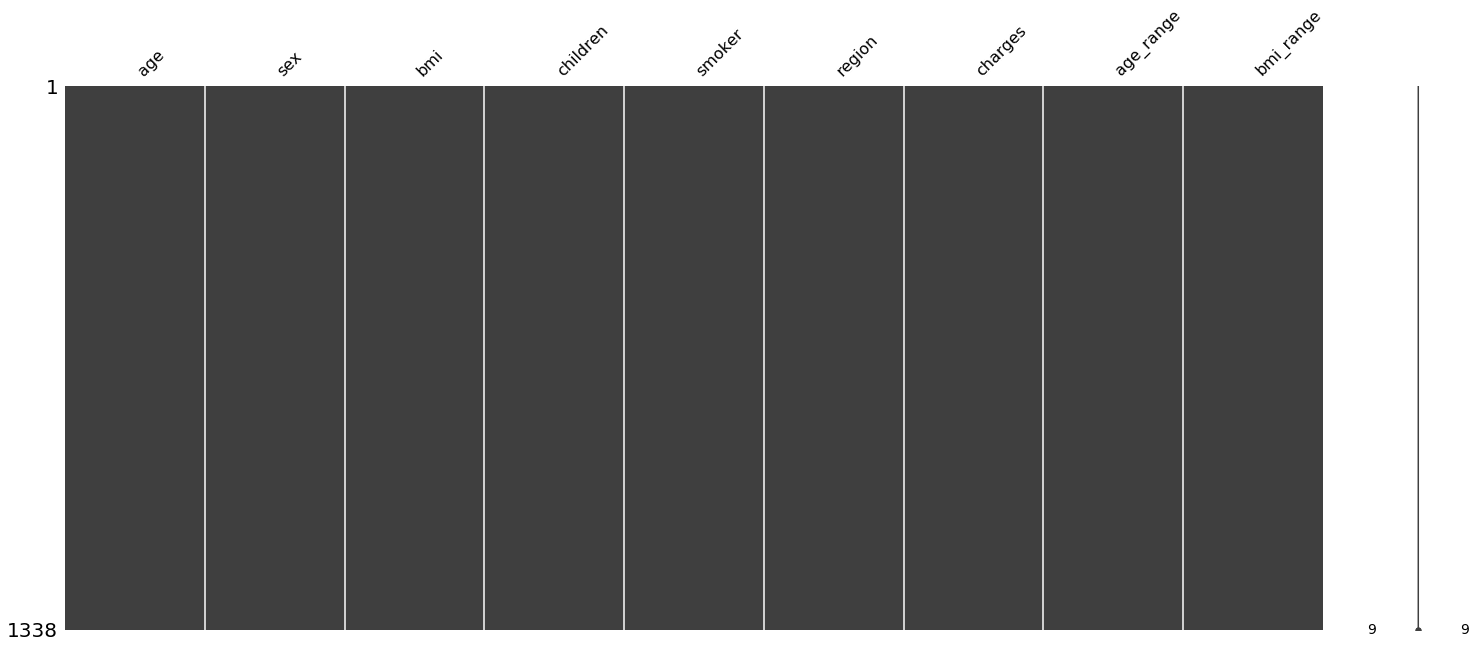

In [5]:
# use the missingno to directly find if there is any missing data
import missingno as mn
mn.matrix(df)

In [6]:
# describe the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
age          1338 non-null int64
sex          1338 non-null object
bmi          1338 non-null float64
children     1338 non-null int64
smoker       1338 non-null object
region       1338 non-null object
charges      1338 non-null float64
age_range    1338 non-null category
bmi_range    1338 non-null category
dtypes: category(2), float64(2), int64(2), object(3)
memory usage: 76.2+ KB


Based on the dataframe information and missingno matrix, there is no missing values or data for this dataset with 1338 instance and 9 features (1338 x 9) (originally 7 features, then we create 2 more features for classification purpose).

But if there is a very small amount of missing data in some columns, we can simply drop those data because it's meaningless to use median impute for features in this dataset.

Besides, we find out that there is one duplicated data. However, because there isn't a 'id' column to identify each instances, and just only one is duplicated, we decided to keep it inside the dataset. 

## 3.2 Data Relationship Exploration

### 3.2.1 Correlation Plot
#### Visualize relationships between a subset of attributes. Use whichever visualization method is appropriate for your data. Explain any interesting relationships. Important: Interpret the implications for each visualization. Visualize at least three subsets of the attributes.

Text(0.5,1,'Correlation Heatmap')

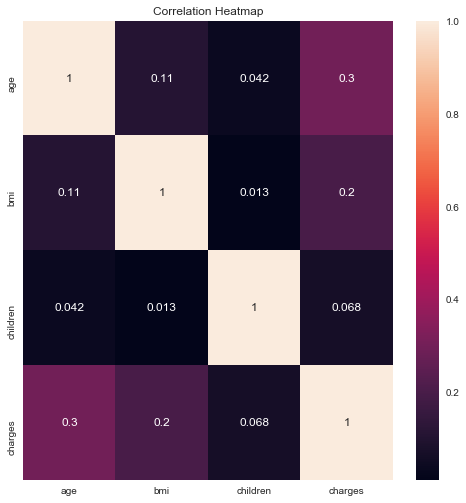

In [7]:
# set the plotting style
cmap = sns.set(style="darkgrid")

# set the figure size
f, ax = plt.subplots(figsize=(7, 7))

# exclude the NaN/null or object datatypes and plot the correlation map
sns.heatmap(df.corr(), cmap=cmap, annot=True)

f.tight_layout()
plt.title('Correlation Heatmap')

Based on the correlation matrix graph we get above, 'age', 'bmi', 'children' and 'charges' are all positively correlated with each other. Because the graph is symmetric, we just focus on the left part of it. The graph shows that 'charges & bmi' and 'charges & age' are comparatively strong correlated with each other, which means more aged people are, or higher bmi people have, the higher costs health insurance have to pay for them. Although 'charges & children' also has a positive correlation, it doesn't correlated with each as strong as 'charges & bmi' and 'charges & age' do.

### 3.2.2 Scatter Plot

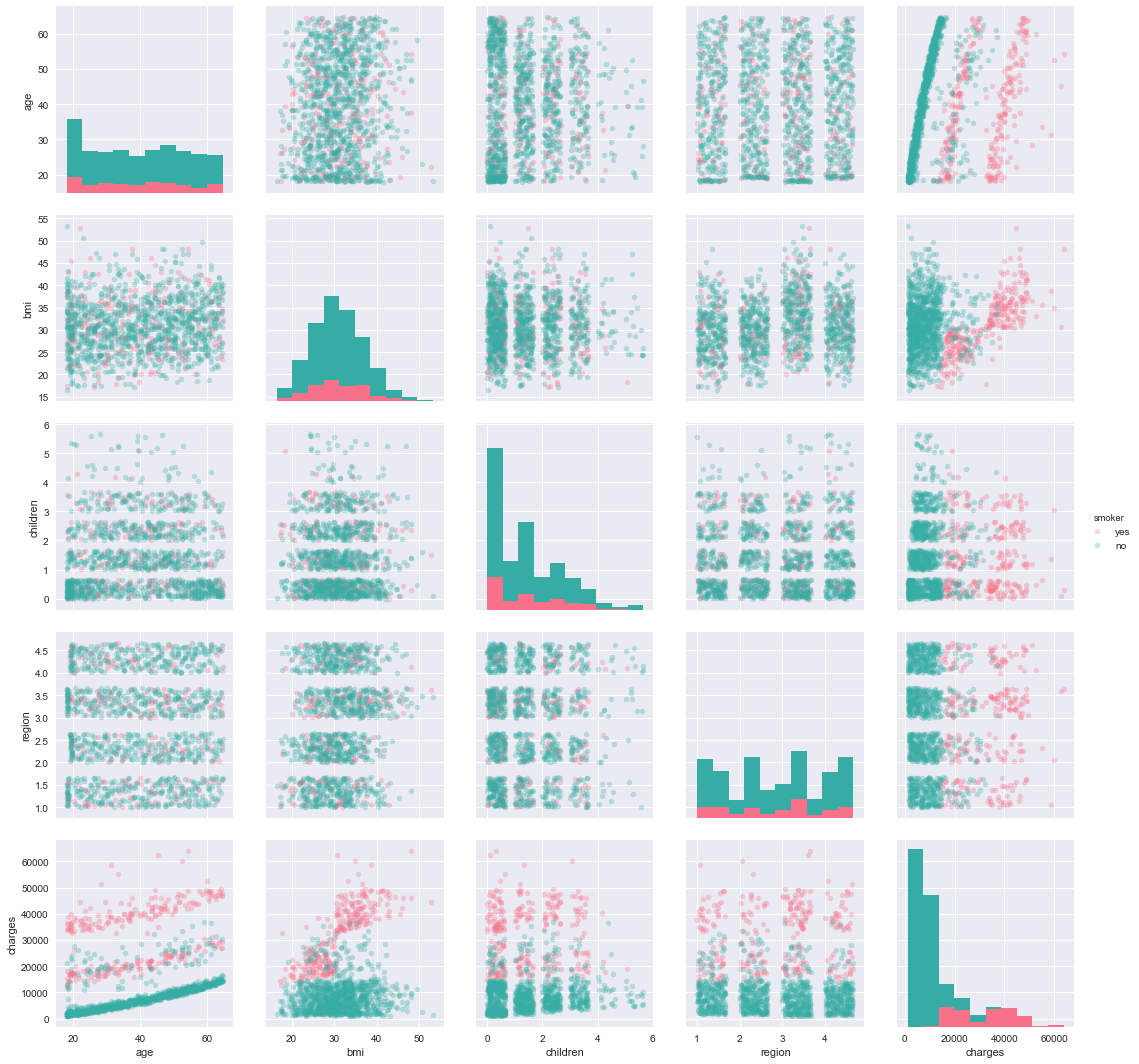

In [49]:
# replace 4 regions with 4 different number
df_changeregion = df.replace(to_replace={'northeast':1,'northwest':2,'southeast':3,'southwest':4})

# make a copy of the dataframe
df_jitterregion = df_changeregion.copy()

# add jitters for plotting
df_jitterregion[['age','bmi','children','region']] += np.random.rand(len(df_jitter),4)/1.5

sns.set_palette('bright')
sns.pairplot(df_jitterregion, hue="smoker", size=3,
            plot_kws=dict(s=30, alpha=0.3, linewidth=0), palette='husl')
plt.show()

From the pairplot graph of 6 attributes, we have a more direct visual understanding of these attribute. Above, we color it whether people smoke or not. The Red dot represents the 'do smoke' people, and the Green dot is for the 'NOT smoke' people. 

The graph shows clearly that people who do smoke have higher costs which are billed by the health insurance than those who do not smoke. The health insurance company may increase the next-year-premiums of people who smoke according to the result above.

Besides, we find out that 'region' is not a strong impact factor for medical charges, but people who live in NO.3 (southeast) region have slightly higher bmi compared to other regions. Maybe the 'southeast' is a costal or wealthier area where people have nutritious diet.